### Credentials - from your Twitter developer account

In [181]:
api_key = <your api key> 
api_secret = <your api secret>
access_token_key = <your token key>
access_token_secret = <your token secret>

### Definitions and imports

In [182]:
# Import all the things
import json
import twitter
import pprint

### Construct the API call

In [217]:
api = twitter.Api(consumer_key=api_key,
                  consumer_secret=api_secret,
                  access_token_key=access_token_key,
                  access_token_secret=access_token_secret)
results = api.GetSearch(raw_query="q=libraries&result_type=mixed&count=100&since_id=967824267948773377&tweet_mode=extended&lang=en", return_json=True)

### Get the tweet contents

In [ ]:
body = results['statuses']
filename = "tweetstream3"
target = open(filename, 'w')
for line in body:
    target.write(line['full_text'])
    foo = str(line['full_text'])
target.close()

### Split the tweets into a list of words

In [225]:
tweetfile = "tweetstream3"
wordfile = "wordfile.csv"
tweetlist = open(tweetfile, 'r')
wordlist = open(wordfile, 'w')
for bar in tweetlist:
    baz = bar.split()
    for word in baz:
        wordlist.write(word)
        wordlist.write("\n")
wordlist.close()    

### wordcloud module usage

In [ ]:
# class wordcloud.WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, 
# prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, 
# random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling=0.5, 
# regexp=None, collocations=True, colormap=None, normalize_plurals=True)[source]

### Use the wordcloud module to create an image

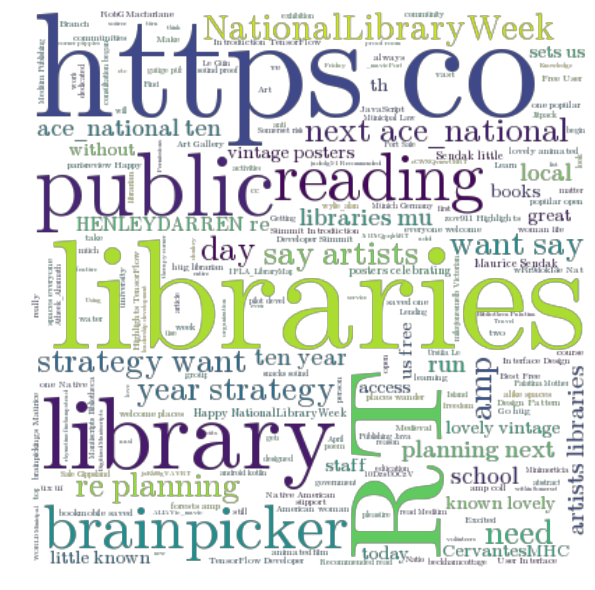

In [253]:
import io
from collections import Counter
from os import path
from pylab import subplots

import matplotlib.pyplot as plt
from wordcloud import WordCloud

% matplotlib inline

wordfile = 'wordfile.csv'
d = path.dirname(wordfile)


# It is important to use io.open to correctly load the file as UTF-8
text = io.open(path.join(d, 'wordfile.csv')).read()

words = text.split()
#print(Counter(words))

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join(d, 'Symbola.ttf')
word_cloud = WordCloud(font_path=font_path, width=400, height=400, mode='RGBA', background_color=None, normalize_plurals=True).generate(text)

# Display the generated image:
fig, ax = subplots(figsize=(10,10))
plt.imshow(word_cloud, aspect='equal')
plt.axis("off")
plt.show()